In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [3]:
df_crop_production = pd.read_csv("../Datasets/OpDataset/crop_production_data.csv")
df_soil_analysis = pd.read_csv("../Datasets/OpDataset/soil_analysis_data.csv")
df_water_usage = pd.read_csv("../Datasets/OpDataset/water_usage_data.csv")

In [4]:
df_crop_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   District                  1000 non-null   object 
 1   Crop                      1000 non-null   object 
 2   Season                    1000 non-null   object 
 3   Area (hectares)           1000 non-null   float64
 4   Yield (quintals)          1000 non-null   float64
 5   Production (metric tons)  1000 non-null   float64
dtypes: float64(3), object(3)
memory usage: 47.0+ KB


In [5]:
df_soil_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   District                    1000 non-null   object 
 1   Soil Type                   1000 non-null   object 
 2   pH Level                    1000 non-null   float64
 3   Organic Matter (%)          1000 non-null   float64
 4   Nitrogen Content (kg/ha)    1000 non-null   float64
 5   Phosphorus Content (kg/ha)  1000 non-null   float64
 6   Potassium Content (kg/ha)   1000 non-null   float64
dtypes: float64(5), object(2)
memory usage: 54.8+ KB


In [6]:
df_water_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   District                             1000 non-null   object 
 1   Crop                                 1000 non-null   object 
 2   Irrigation Method                    1000 non-null   object 
 3   Water Consumption (liters/hectare)   1000 non-null   float64
 4   Water Availability (liters/hectare)  1000 non-null   float64
dtypes: float64(2), object(3)
memory usage: 39.2+ KB


In [7]:
merge_soil_crop_production = df_crop_production.merge(df_soil_analysis, on = ['District'])

In [8]:
merge_water_soil_crop_production = merge_soil_crop_production.merge(df_water_usage, on = ['District', 'Crop'])

In [9]:
database = merge_water_soil_crop_production.copy()
database.head()

,District,Crop,Season,Area (hectares),Yield (quintals),Production (metric tons),Soil Type,pH Level,Organic Matter (%),Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha),Irrigation Method,Water Consumption (liters/hectare),Water Availability (liters/hectare)
0,Jodhpur,Wheat,Kharif,16490.142459,30.691986,5061.15223,Sandy,7.453182,2.662898,23.564182,13.014409,37.082003,Sprinkler Irrigation,9738.809833,10557.488279
1,Jodhpur,Wheat,Kharif,16490.142459,30.691986,5061.15223,Sandy,7.453182,2.662898,23.564182,13.014409,37.082003,Sprinkler Irrigation,13591.319448,14448.126887
2,Jodhpur,Wheat,Kharif,16490.142459,30.691986,5061.15223,Sandy,7.453182,2.662898,23.564182,13.014409,37.082003,Drip Irrigation,8811.686999,8512.323275
3,Jodhpur,Wheat,Kharif,16490.142459,30.691986,5061.15223,Sandy,7.453182,2.662898,23.564182,13.014409,37.082003,Sprinkler Irrigation,8860.161716,9434.989877
4,Jodhpur,Wheat,Kharif,16490.142459,30.691986,5061.15223,Chalky (Calcareous),7.305740,2.095212,32.246094,17.450967,40.172205,Sprinkler Irrigation,9738.809833,10557.488279


In [10]:
database = database.drop(columns = ['Production (metric tons)', 'Water Consumption (liters/hectare)'], axis = 1)
database.head()

,District,Crop,Season,Area (hectares),Yield (quintals),Soil Type,pH Level,Organic Matter (%),Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha),Irrigation Method,Water Availability (liters/hectare)
0,Jodhpur,Wheat,Kharif,16490.142459,30.691986,Sandy,7.453182,2.662898,23.564182,13.014409,37.082003,Sprinkler Irrigation,10557.488279
1,Jodhpur,Wheat,Kharif,16490.142459,30.691986,Sandy,7.453182,2.662898,23.564182,13.014409,37.082003,Sprinkler Irrigation,14448.126887
2,Jodhpur,Wheat,Kharif,16490.142459,30.691986,Sandy,7.453182,2.662898,23.564182,13.014409,37.082003,Drip Irrigation,8512.323275
3,Jodhpur,Wheat,Kharif,16490.142459,30.691986,Sandy,7.453182,2.662898,23.564182,13.014409,37.082003,Sprinkler Irrigation,9434.989877
4,Jodhpur,Wheat,Kharif,16490.142459,30.691986,Chalky (Calcareous),7.305740,2.095212,32.246094,17.450967,40.172205,Sprinkler Irrigation,10557.488279


In [11]:
database.isnull().sum()

District                               0
Crop                                   0
Season                                 0
Area (hectares)                        0
Yield (quintals)                       0
Soil Type                              0
pH Level                               0
Organic Matter (%)                     0
Nitrogen Content (kg/ha)               0
Phosphorus Content (kg/ha)             0
Potassium Content (kg/ha)              0
Irrigation Method                      0
Water Availability (liters/hectare)    0
dtype: int64

In [12]:
database.duplicated().sum()

0

In [13]:
X = database.drop(columns=['Yield (quintals)'])  # Features
y = database['Yield (quintals)']  # Target

In [14]:
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X[['District', 'Crop', 'Season', 'Soil Type', 'Irrigation Method']])
feature_names = encoder.get_feature_names_out(['District', 'Crop', 'Season', 'Soil Type', 'Irrigation Method'])
X_categorical = pd.DataFrame(X_encoded.toarray(), columns=feature_names)
X_numeric = X.drop(columns=['District', 'Crop', 'Season', 'Soil Type', 'Irrigation Method'])

In [15]:
X_processed = pd.concat([X_categorical, X_numeric], axis=1)

In [49]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [51]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_val_scaled shape:", X_val_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (260148, 54)
X_val_scaled shape: (86716, 54)
X_test_scaled shape: (86716, 54)


In [52]:
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_val_reshaped = X_val_scaled.reshape(X_val_scaled.shape[0], X_val_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

In [53]:
# Define the CNN mode

In [54]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2], 1)),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer
])

In [55]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [56]:
history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_val_reshaped, y_val))

Epoch 1/20
8130/8130 [==============================] - 126s 15ms/step - loss: 69.0719 - mae: 6.9121 - val_loss: 65.0362 - val_mae: 6.7312
Epoch 2/20
8130/8130 [==============================] - 126s 15ms/step - loss: 60.6925 - mae: 6.4369 - val_loss: 50.7847 - val_mae: 5.7704
Epoch 3/20
8130/8130 [==============================] - 115s 14ms/step - loss: 46.8113 - mae: 5.4976 - val_loss: 40.6983 - val_mae: 5.0566
Epoch 4/20
8130/8130 [==============================] - 112s 14ms/step - loss: 37.1933 - mae: 4.7831 - val_loss: 31.2801 - val_mae: 4.2745
Epoch 5/20
8130/8130 [==============================] - 118s 14ms/step - loss: 26.3632 - mae: 3.8243 - val_loss: 22.0878 - val_mae: 3.4066
Epoch 6/20
8130/8130 [==============================] - 113s 14ms/step - loss: 19.7454 - mae: 3.1725 - val_loss: 17.6189 - val_mae: 2.9432
Epoch 7/20
8130/8130 [==============================] - 118s 15ms/step - loss: 15.8171 - mae: 2.7530 - val_loss: 15.2529 - val_mae: 2.7411
Epoch 8/20
8130/8130 [=====

In [57]:
mse, mae = model.evaluate(X_test_reshaped, y_test)

2710/2710 [==============================] - 15s 5ms/step - loss: 4.1457 - mae: 1.1768


In [58]:
predictions = model.predict(X_test_reshaped)

2710/2710 [==============================] - 11s 4ms/step


In [59]:
r2_test = r2_score(y_test, predictions)

In [60]:
print(f"Mean Square Error: {mse:.4f}")
print(f"Root Mean Square Error: {np.sqrt(mse):.4f}")
print(f"R2 Score: {r2_test:.4f}")

Mean Square Error: 4.1457
Root Mean Square Error: 2.0361
R2 Score: 0.9394


In [61]:
# Plotting actual vs. predicted values

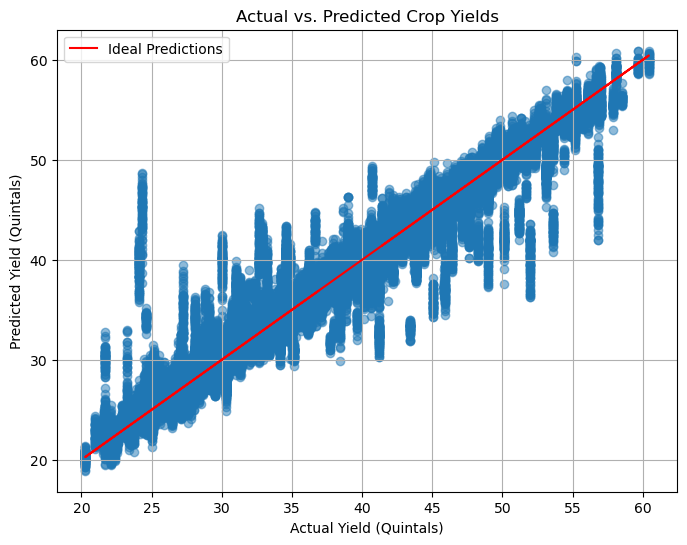

In [62]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot(y_test, y_test, color='red', label='Ideal Predictions')
plt.title('Actual vs. Predicted Crop Yields')
plt.xlabel('Actual Yield (Quintals)')
plt.ylabel('Predicted Yield (Quintals)')
plt.legend()
plt.grid(True)
plt.show()